# Pandas profiling ist legit

# EDA

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import scipy.stats as ss
from helper_functions.metrics import durbin_watson,mean_absolute_percentage_error, cramers_v

## Überblick der Daten

Erstmal lesen wir die Daten ein und schauen mal wie viele Objekte und Features wir haben.

In [ ]:
csv_data = pd.read_csv('immo_dev_data.csv') # Hallo?

In [ ]:
csv_data[csv_data['Id']==42202891]

,Id,AreaLiving,AreaProperty,BuiltYear,FloorNumber,ForestDensityL,ForestDensityM,ForestDensityS,GroupNameDe,HouseObject,...,gde_private_apartments,gde_social_help_quota,gde_tax,gde_workers_sector1,gde_workers_sector2,gde_workers_sector3,gde_workers_total,location_has_street,location_is_complete,PurchasePrice


In [ ]:
csv_data['Id'].max()

42175937

In [ ]:
csv_data.shape

(153627, 69)

In [ ]:
csv_data.head()

,Id,AreaLiving,AreaProperty,BuiltYear,FloorNumber,ForestDensityL,ForestDensityM,ForestDensityS,GroupNameDe,HouseObject,...,gde_private_apartments,gde_social_help_quota,gde_tax,gde_workers_sector1,gde_workers_sector2,gde_workers_sector3,gde_workers_total,location_has_street,location_is_complete,PurchasePrice
0,7135329,140.0,501.0,2016,NaN,0.418964,0.555985,0.730714,Haus,True,...,1358.0,3.660512,8.73,17.0,162.0,358.0,537.0,0,0,745000.0
1,7170979,143.0,277.0,2004,NaN,0.033259,0.074061,0.076468,Haus,True,...,3476.0,3.634717,6.13,0.0,2250.0,2787.0,5041.0,1,1,780000.0
2,7172246,160.0,712.0,1945,NaN,0.000000,0.000000,0.000000,Haus,True,...,2806.0,2.512344,9.79,167.0,1694.0,1138.0,2999.0,0,0,570000.0
3,7172252,351.0,496.0,2016,NaN,0.037575,0.000000,0.000000,Haus,True,...,131.0,1.734104,9.15,12.0,10.0,17.0,39.0,0,0,920000.0
4,7172733,400.0,1800.0,1975,NaN,0.095162,0.097193,0.153314,Haus,True,...,1181.0,1.056052,2.97,0.0,27.0,701.0,732.0,0,0,3950000.0


Wir sehen es sind 153627 Objekte mit jeweils 69 Features. Betrachtet man die ersten fünf Einträge, stellt man fest es sind zu viele Features um überhaupt richtig dargestellt zu werden. Schauen wir uns deshalb eine Liste der Features an:

In [ ]:
csv_data.columns

Index(['Id', 'AreaLiving', 'AreaProperty', 'BuiltYear', 'FloorNumber',
       'ForestDensityL', 'ForestDensityM', 'ForestDensityS', 'GroupNameDe',
       'HouseObject', 'LastUpdate', 'Latitude', 'Locality', 'Longitude',
       'Name', 'NoisePollutionRailwayL', 'NoisePollutionRailwayM',
       'NoisePollutionRailwayS', 'NoisePollutionRoadL', 'NoisePollutionRoadM',
       'NoisePollutionRoadS', 'PopulationDensityL', 'PopulationDensityM',
       'PopulationDensityS', 'RealEstateTypeId', 'Renovationyear',
       'RiversAndLakesL', 'RiversAndLakesM', 'RiversAndLakesS', 'Rooms',
       'SourceId', 'StateShort', 'StreetAndNr', 'TravelTimeMiv',
       'WorkplaceDensityL', 'WorkplaceDensityM', 'WorkplaceDensityS', 'Zip',
       'distanceToTrainStation', 'gde_area_agriculture_percentage',
       'gde_area_forest_percentage', 'gde_area_nonproductive_percentage',
       'gde_area_settlement_percentage', 'gde_average_house_hold',
       'gde_empty_apartments', 'gde_foreigners_percentage',
       'g

## Fehlende Werte

Als nächstes betrachten wir die fehlenden Werte an. In der Tabelle sind alle Features aufgeführt, bei denen Werte fehlen.

In [ ]:
def get_na_df(df):
    '''
    Returns a dataframe with an overview of missing values.
    '''
    name = []
    value = []

    for i in df.columns:
        if df[i].isnull().sum() > 1:
            name.append(i)
            value.append([df[i].isnull().sum()])
    
    return pd.DataFrame.from_dict(dict((zip(name, value)))).melt(var_name = 'feature', value_name = 'number_na')

In [ ]:
get_na_df(csv_data)

,feature,number_na
0,FloorNumber,87695
1,Renovationyear,138326
2,StreetAndNr,46435
3,TravelTimeMiv,2
4,gde_area_agriculture_percentage,2
5,gde_area_forest_percentage,2
6,gde_area_nonproductive_percentage,2
7,gde_area_settlement_percentage,2
8,gde_average_house_hold,2
9,gde_empty_apartments,2


Die meisten Features sind vollständig, von insgesammt 69 fehlen nur Werte bei 30. Bei über der Hälfte sind es so wenige die fehlen, dass man es vollkommen vernachlässigen kann. 

Bei anderen sind es jedoch deutlich mehr, beispielsweise:
- Renovationyear: 138326
- FloorNumber: 87695

Das ist aber nicht immer ein schlechtes Zeichen. Zum Beispiel muss nicht jedes Objekt renoviert worden sein, somit kann die Anzahl der fehlenden Werte zu erwarten sein (es muss natürlich später noch auf Plausibilität geprüft werden). Etwas ähnliches gilt für FloorNumber: ist das Objekt ein ganzes Haus, macht es keinen Sinn die Etage anzugeben.

## Statistische Analyse der einzelnen Features

Um Weitere Anomalien in den Daten feststellen zu können, ist es sinnvoll eine kurze statistische Zusammenfassung der Daten anzuschauen. Diese enthält: 
- Anzahl Werte
- Mittelwert
- Standartabweichung
- kleinsten Wert
- erstes Quartil
- zweites Quartil (Median)
- drittes Quartil
- grössten Wert

Diese Werte können dann auf Plausibilität getestet werden.

In [ ]:
#sns.pairplot(csv_data)

### AreaLiving

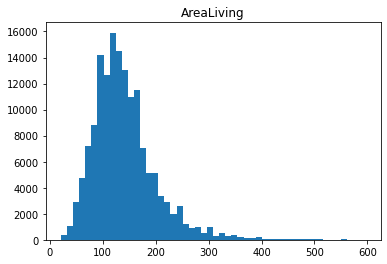

count    153627.000000
mean        141.261625
std          61.025164
min          21.000000
25%         100.000000
50%         130.000000
75%         168.000000
max         596.000000
Name: AreaLiving, dtype: float64

In [ ]:
feature = csv_data.columns[1]

plt.hist(csv_data[feature], bins = 50)
plt.title(feature)
plt.show()
csv_data[feature].describe()

### AreaProperty

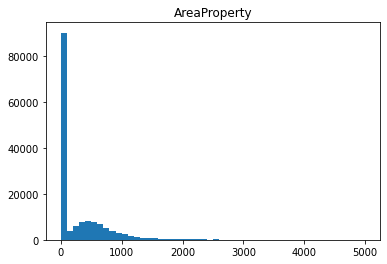

count    153627.000000
mean        290.945532
std         490.419149
min           0.000000
25%           0.000000
50%           0.000000
75%         495.000000
max        4999.000000
Name: AreaProperty, dtype: float64

In [ ]:
feature = csv_data.columns[2]

plt.hist(csv_data[feature], bins = 50)
plt.title(feature)
plt.show()
csv_data[feature].describe()

### BuiltYear

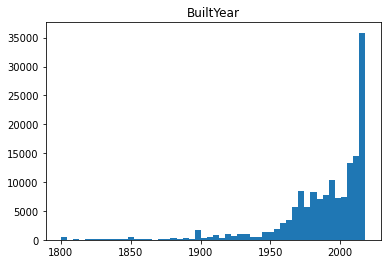

count    153627.000000
mean       1989.006522
std          32.543506
min        1800.000000
25%        1976.000000
50%        1997.000000
75%        2013.000000
max        2018.000000
Name: BuiltYear, dtype: float64

In [ ]:
feature = csv_data.columns[3]

plt.hist(csv_data[feature], bins = 50)
plt.title(feature)
plt.show()
csv_data[feature].describe()

### FloorNumber

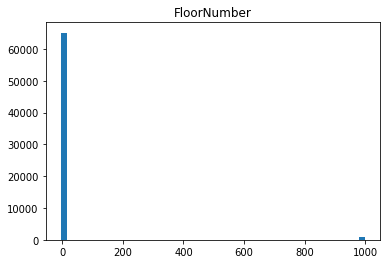

count    65932.000000
mean        12.771659
std        105.121187
min         -5.000000
25%          0.000000
50%          1.000000
75%          2.000000
max       1000.000000
Name: FloorNumber, dtype: float64

In [ ]:
feature = csv_data.columns[4]

plt.hist(csv_data[feature], bins = 50)
plt.title(feature)
plt.show()
csv_data[feature].describe()

### ForestDensityL

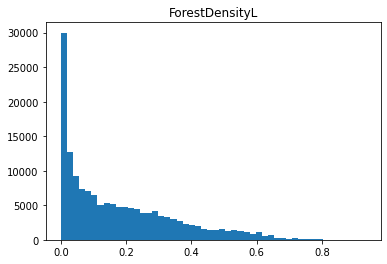

count    153627.000000
mean          0.176572
std           0.170922
min           0.000000
25%           0.029694
50%           0.126613
75%           0.281399
max           0.932371
Name: ForestDensityL, dtype: float64

In [ ]:
feature = csv_data.columns[5]

plt.hist(csv_data[feature], bins = 50)
plt.title(feature)
plt.show()
csv_data[feature].describe()

### ForestDensityM

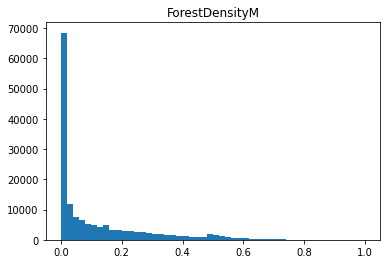

count    153627.000000
mean          0.111945
std           0.156796
min           0.000000
25%           0.000000
50%           0.032758
75%           0.168512
max           1.000000
Name: ForestDensityM, dtype: float64

In [ ]:
feature = csv_data.columns[6]

plt.hist(csv_data[feature], bins = 50)
plt.title(feature)
plt.show()
csv_data[feature].describe()

### ForestDensityS

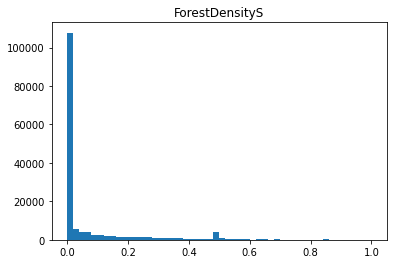

count    153627.000000
mean          0.068862
std           0.147892
min           0.000000
25%           0.000000
50%           0.000000
75%           0.048158
max           1.000000
Name: ForestDensityS, dtype: float64

In [ ]:
feature = csv_data.columns[7]

plt.hist(csv_data[feature], bins = 50)
plt.title(feature)
plt.show()
csv_data[feature].describe()

### GroupNameDe

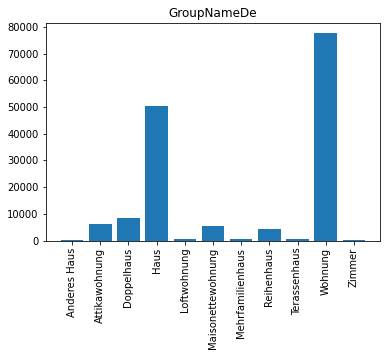

count      153627
unique         11
top       Wohnung
freq        77499
Name: GroupNameDe, dtype: object

In [ ]:
feature = csv_data.columns[8]

plt.bar(csv_data[feature].groupby(csv_data[feature]).count().to_dict().keys(), csv_data[feature].groupby(csv_data[feature]).count().to_dict().values())
plt.xticks(rotation = 90)
plt.title(feature)
plt.show()
csv_data[feature].describe()

### HouseObject

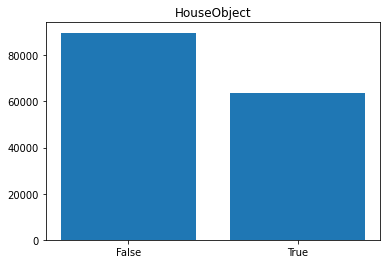

count     153627
unique         2
top        False
freq       89794
Name: HouseObject, dtype: object

In [ ]:
feature = csv_data.columns[9]

plt.bar(csv_data[feature].groupby(csv_data[feature]).count().to_dict().keys(), csv_data[feature].groupby(csv_data[feature]).count().to_dict().values())
plt.title(feature)
plt.xticks([0, 1], [False, True])
plt.show()
csv_data[feature].describe()

### LastUpdate

In [ ]:
#feature = csv_data.columns[10]
#
#plt.hist(csv_data[feature], bins = 50)
#plt.title(feature)
#plt.show()
#csv_data[feature].describe()

### Latitude and Longitude

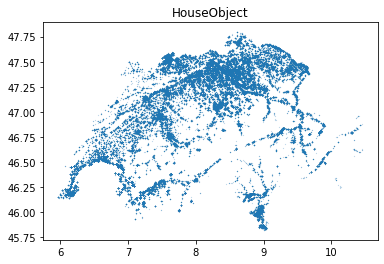

count     153627
unique         2
top        False
freq       89794
Name: HouseObject, dtype: object

In [ ]:
lat = csv_data['Latitude'].to_numpy()
long = csv_data['Longitude'].to_numpy()
plt.scatter(long, lat, s = 0.01)
plt.title(feature)
plt.show()
csv_data[feature].describe()

### Locality
What are the most frequent and most rare localities?

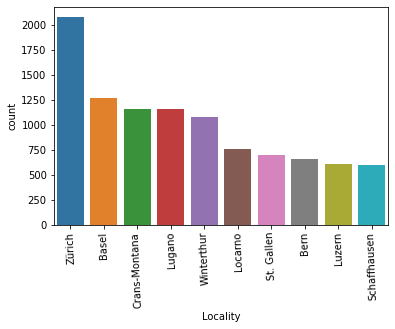

In [ ]:
n = 10 # Show top N
feature = 'Locality'
top_n_frequent_cities = csv_data[feature].value_counts().head(10).index.tolist()
csv_data_filtered_freq_cities = csv_data[csv_data[feature].isin(top_n_frequent_cities)]
sns.countplot(x=feature,data=csv_data_filtered_freq_cities, order = top_n_frequent_cities)
plt.xticks(rotation=92.5)
plt.show()

Hat es viele Orte, welche nur 1x vorkommen?

In [ ]:
(csv_data[feature].value_counts()==1).sum()


368

In [ ]:
feature = 'Locality'
csv_data[feature].nunique()

3954

Da Locality aus fast 4000 unterschiedlichen kategorischen Werten (in diesem Fall Orten) besteht, gibt es keine sinnvolle Art die Werte darzustellen.

### Name

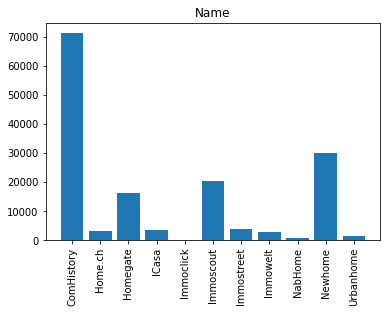

count         153627
unique            11
top       ComHistory
freq           71180
Name: Name, dtype: object

In [ ]:
feature = csv_data.columns[14]

plt.bar(csv_data[feature].groupby(csv_data[feature]).count().to_dict().keys(), csv_data[feature].groupby(csv_data[feature]).count().to_dict().values())
plt.xticks(rotation = 90)
plt.title(feature)
plt.show()
csv_data[feature].describe()

In [ ]:
# errors in data: built year cant be bigger then renovation
invalid_data_ids = csv_data[csv_data['BuiltYear'] > csv_data['Renovationyear']]['Id']
print("Number of invalid Data-entries: ", invalid_data_ids.count())
invalid_data_ids

Number of invalid Data-entries:  23


241        7335918
265        7557601
506        7974831
3118      10988306
4866      12593858
8465      17912435
9763      20367510
26345     25501338
50033     31890485
50037     31903372
53244     34516331
53423     34774125
53777     35044188
54335     35652133
64208      7335788
64222      7337121
69849     11143653
70503     11532312
82710     22077791
88815     24527766
139154    36744498
143706    39400944
144252    39592179
Name: Id, dtype: int64

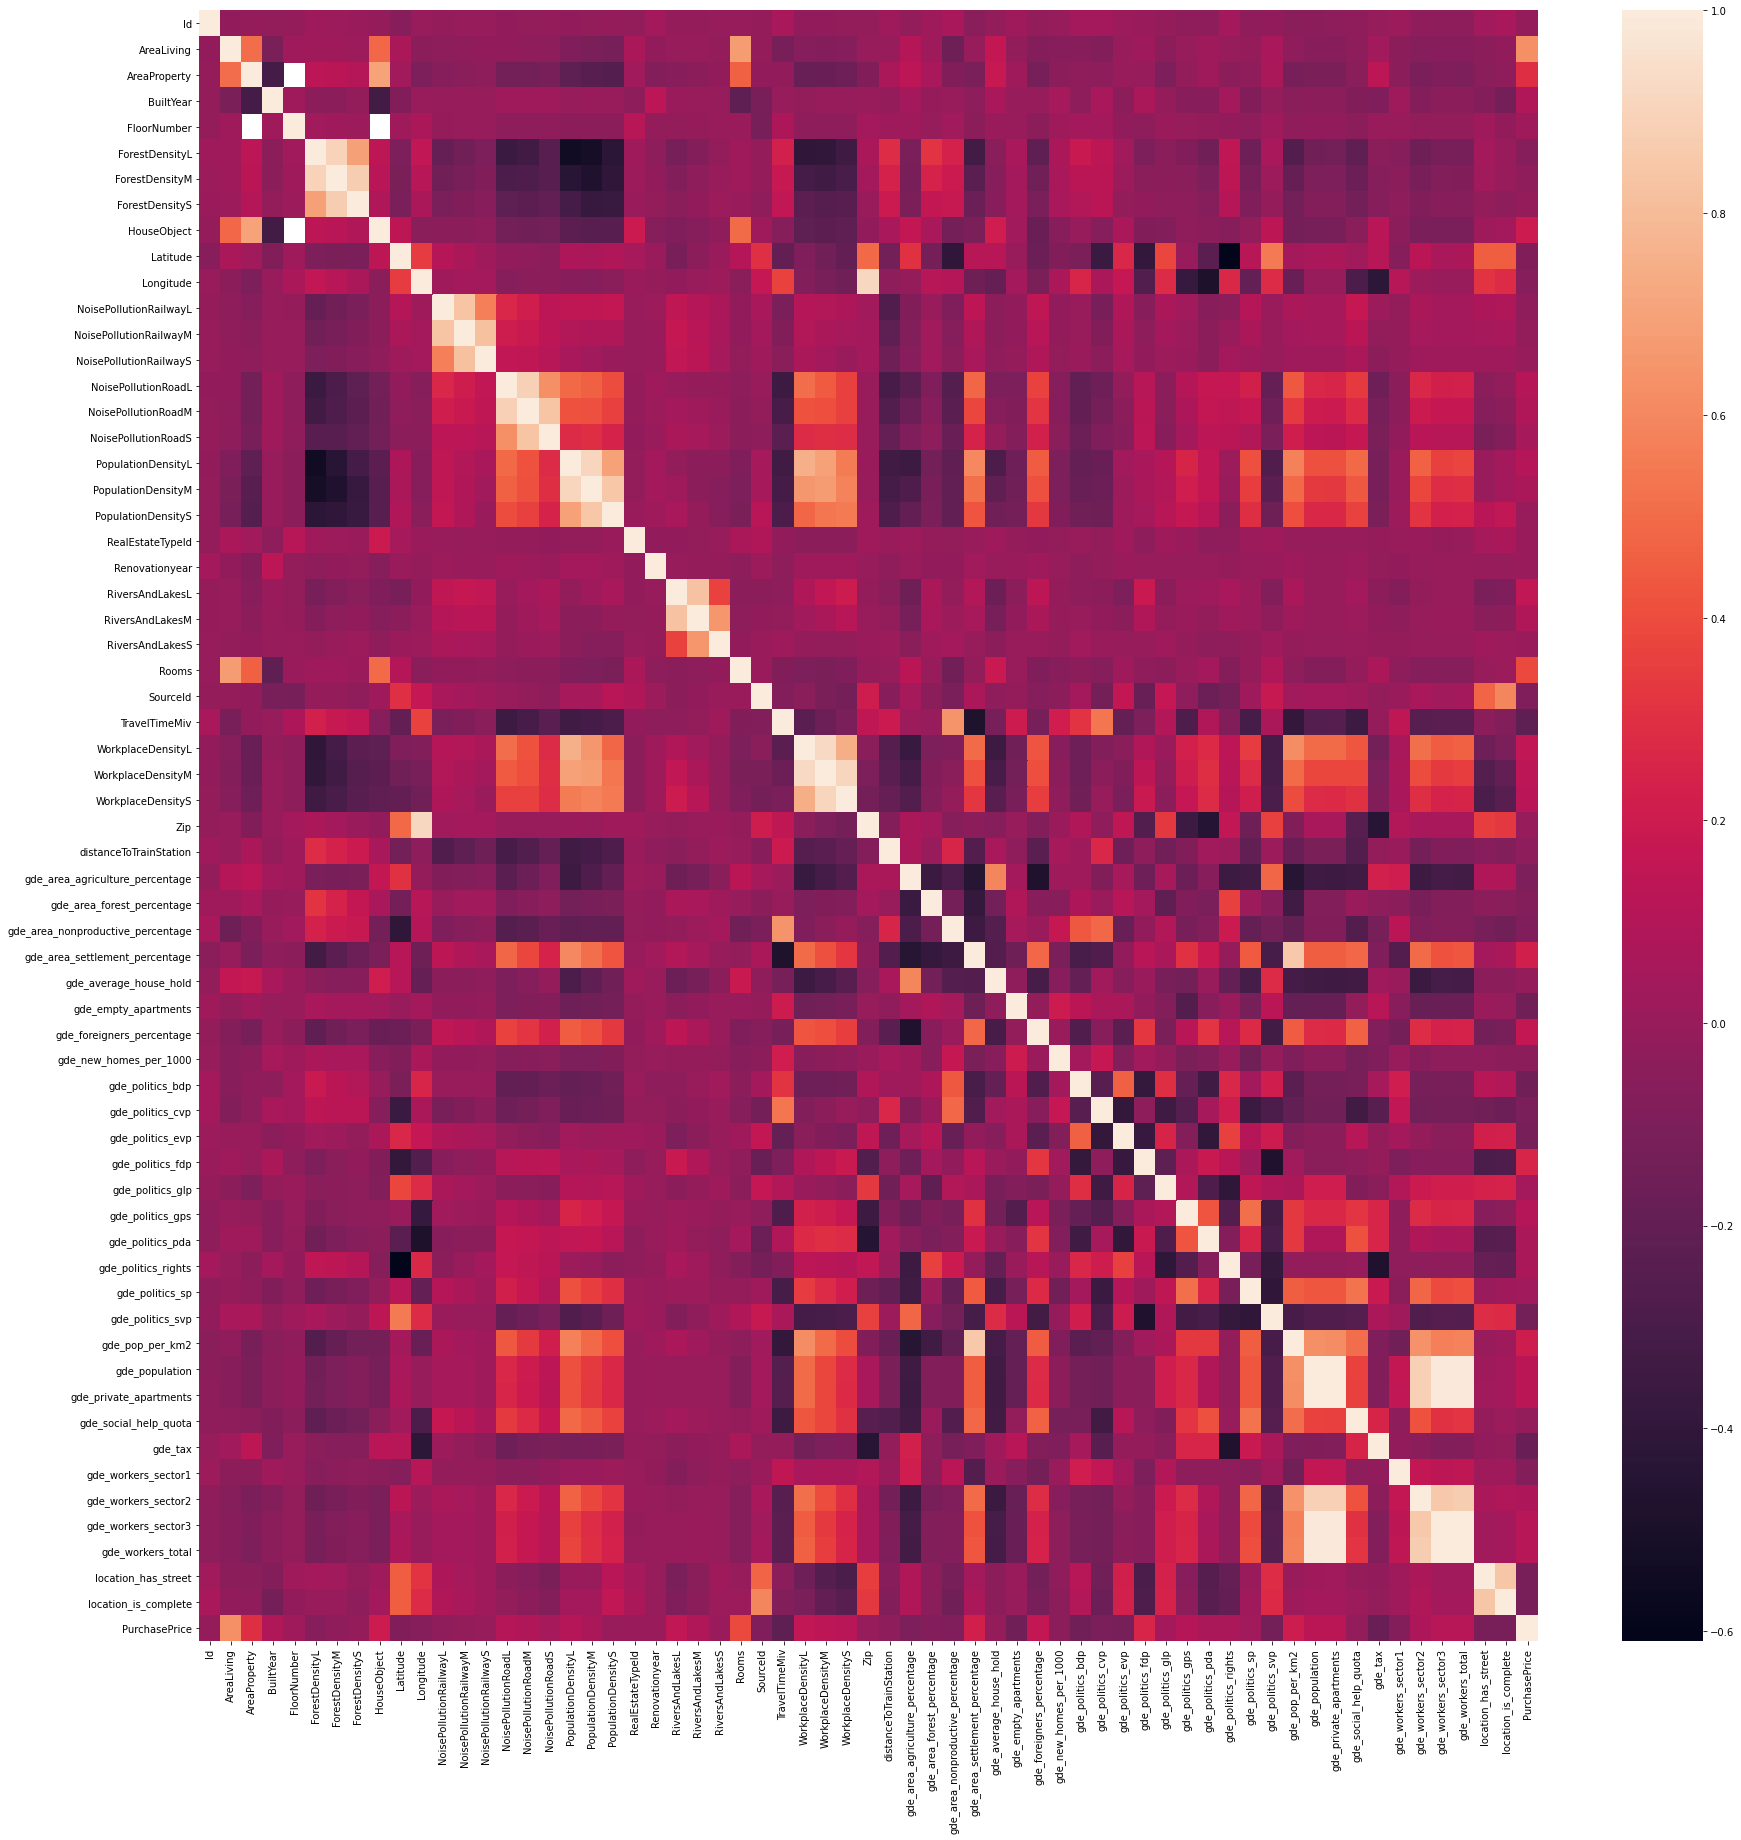

In [ ]:
csv_data_corr = csv_data.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(csv_data_corr)#, annot = True)
plt.show()

This is too much data. Which attributes have an inpact on PurchasePrice?

In [ ]:
csv_data_corr_filtered = csv_data_corr[np.abs(csv_data_corr)>0.2]['PurchasePrice']
csv_data_corr_filtered.dropna()

AreaLiving                        0.627381
AreaProperty                      0.292464
Rooms                             0.386988
TravelTimeMiv                    -0.219333
gde_area_settlement_percentage    0.221011
gde_politics_fdp                  0.254452
gde_pop_per_km2                   0.205108
PurchasePrice                     1.000000
Name: PurchasePrice, dtype: float64

Es ist nicht möglich die Korrelation von Strings zu berechnen. Ebenfalls beudetet es nicht, dass z.B. eine höhere Zip-Nummer 
einem höheren Verkaufspreis entspricht. Diese Fälle muss man separat anschauen. Zip hat aber viele einzigartige Einträge, 
wir können also Zip nicht einfach Onehot-Encoden. Eine Möglichkeit ist, die Zip-Nummern auf zwei oder drei Stellen
zu kürzen. Unten kann man sehen, was dies für einen Einfluss hat.

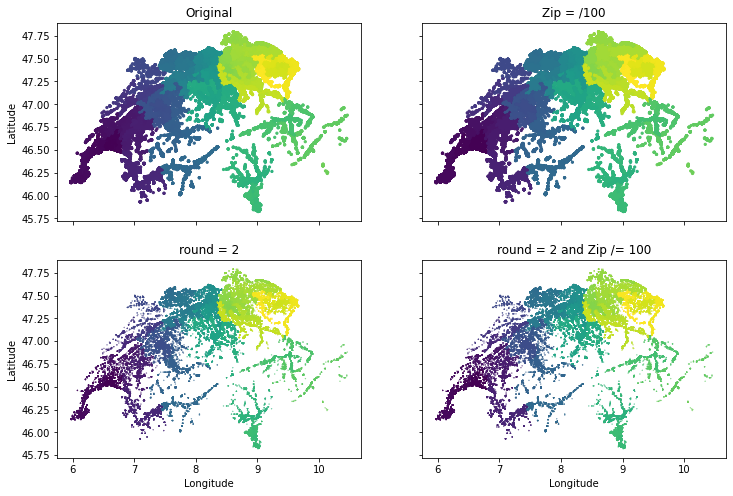

In [ ]:
fig, axs = plt.subplots(2, 2, figsize = (12, 8))
axs[0, 0].scatter(csv_data['Longitude'], csv_data['Latitude'], c = csv_data['Zip'], s = 5)
axs[0, 0].set_title('Original')
axs[0, 1].scatter(csv_data['Longitude'], csv_data['Latitude'], c = (csv_data['Zip'] / 100).astype('int64'), s = 5)
axs[0, 1].set_title('Zip /= 100')
axs[1, 0].scatter(csv_data['Longitude'].round(decimals = 2), csv_data['Latitude'].round(decimals = 2), c = csv_data['Zip'], s = 0.1)
axs[1, 0].set_title('round = 2')
axs[1, 1].scatter(csv_data['Longitude'].round(decimals = 2), csv_data['Latitude'].round(decimals = 2), c = (csv_data['Zip'] / 100).astype('int64'), s = 0.1)
axs[1, 1].set_title('round = 2 and Zip /= 100')

for ax in axs.flat:
    ax.set(xlabel='Longitude', ylabel='Latitude')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

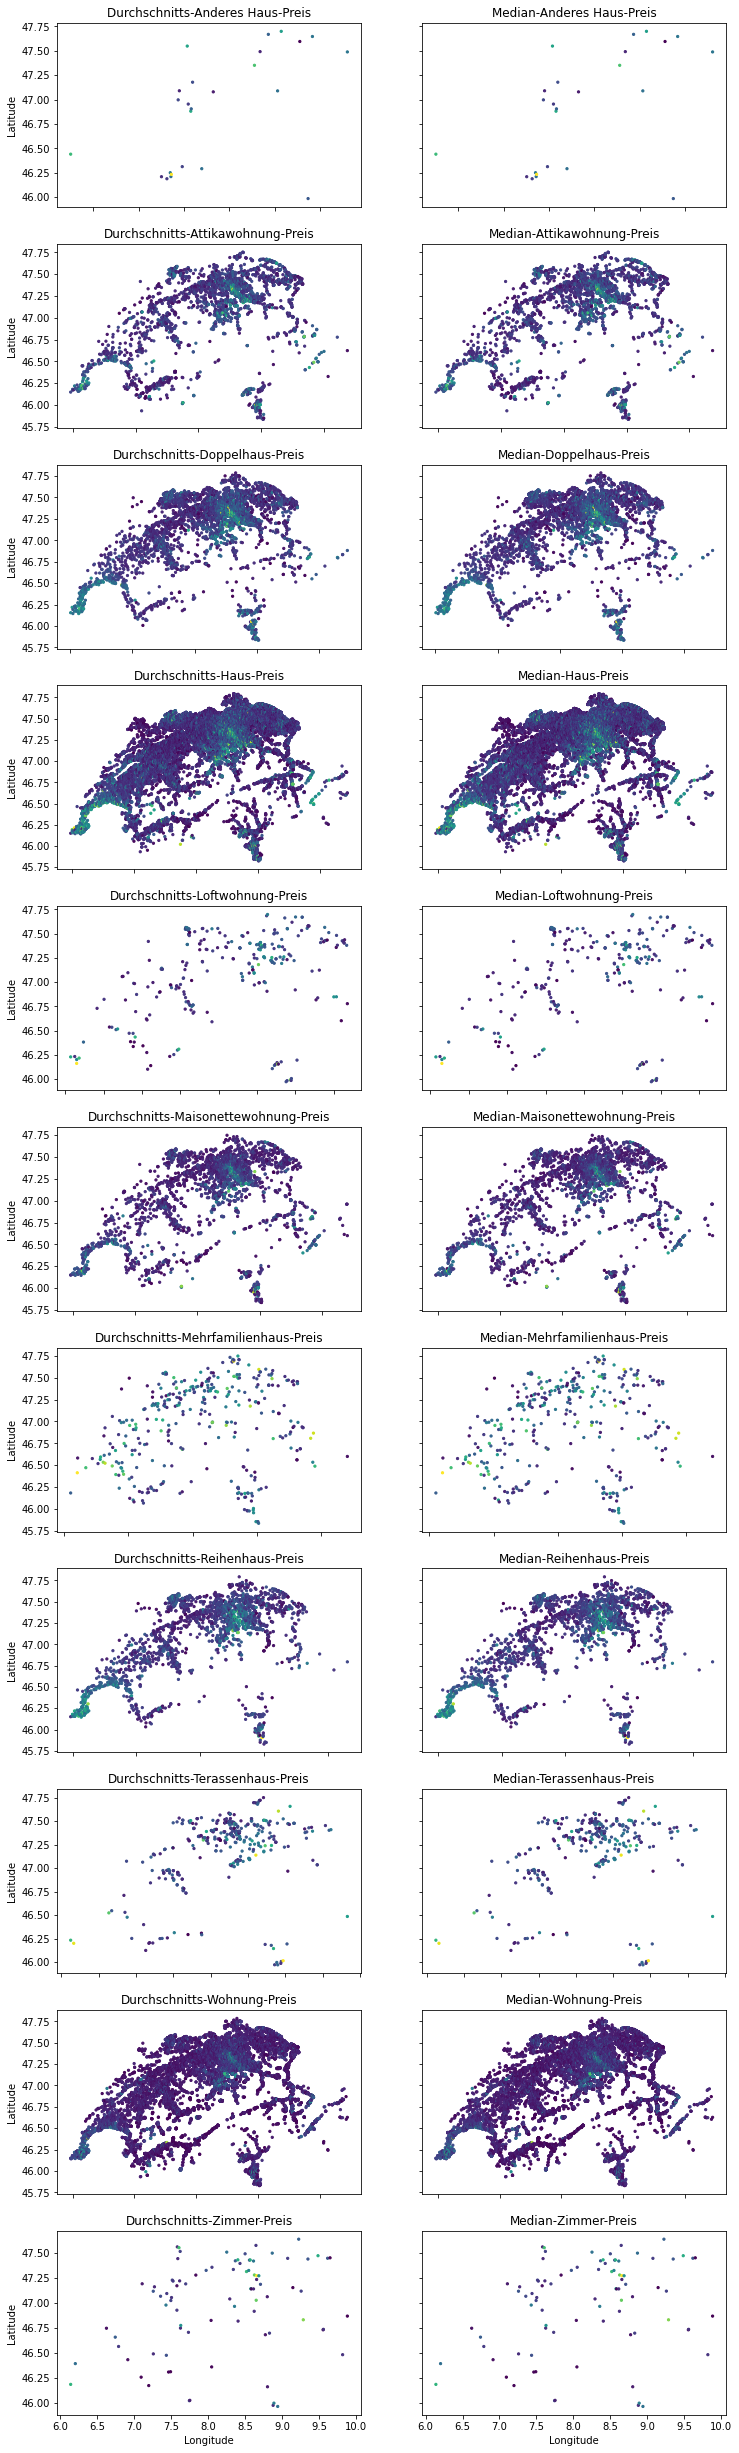

In [ ]:
csv_data_long_lat_rounded = csv_data.copy()
csv_data_long_lat_rounded['Longitude'] = np.round(csv_data_long_lat_rounded['Longitude'],3)
csv_data_long_lat_rounded['Latitude'] = np.round(csv_data_long_lat_rounded['Latitude'],3)

rows = len(np.unique(csv_data_long_lat_rounded['GroupNameDe']))
fig, axs = plt.subplots(rows, 2, figsize = (12, 4*rows))
for i, col in enumerate(np.unique(csv_data_long_lat_rounded['GroupNameDe'])):
    df_ = csv_data_long_lat_rounded[csv_data_long_lat_rounded['GroupNameDe']==col]
    df_mean_ = df_.groupby(by=['GroupNameDe', 'Longitude', 'Latitude']).mean().reset_index()
    df_median_ = df_.groupby(by=['GroupNameDe', 'Longitude', 'Latitude']).median().reset_index()
    axs[i, 0].scatter(df_mean_['Longitude'], df_mean_['Latitude'], c = df_mean_['PurchasePrice'], s = 5)
    axs[i, 0].set_title('Durchschnitts-{}-Preis'.format(col))
    axs[i, 1].scatter(df_median_['Longitude'], df_median_['Latitude'], c = df_median_['PurchasePrice'], s = 5)
    axs[i, 1].set_title('Median-{}-Preis'.format(col))

for ax in axs.flat:
    ax.set(xlabel='Longitude', ylabel='Latitude')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Man sieht also, dass die Lage definitiv Einfluss auf die Lage hat. Anhand der Farben kann man klar den Zürichsee, 
Genfersee, Luganersee und die Umgebung um St.Moritz erkennen. Wir müssen beim predicten des Preises umbedingt die Umgebung miteinbeziehen, 
entweder durch die Lage oder besser die Zip-Nummer.

Es hat auch noch das Attribut "StreetAndNr", welches aber sehr unique ist und oft leer ist. Mit diesem Attribut könnte man einen
Descision-Tree Model wohl verbessern. Für die nachfolgende Analyse wird es aber gedropped. Das selbe mit "LastUpdate"
und "Locality".

In [ ]:
print(df_selected['StreetAndNr'].describe(), "\n\n", df_selected['LastUpdate'].describe(), "\n\n",df_selected['Locality'].describe())

count           107192
unique           62151
top       Dorfstrasse 
freq                99
Name: StreetAndNr, dtype: object 

 count                  153627
unique                 142024
top       2017-12-29 06:46:03
freq                        7
Name: LastUpdate, dtype: object 

 count     153627
unique      3954
top       Zürich
freq        2074
Name: Locality, dtype: object


/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


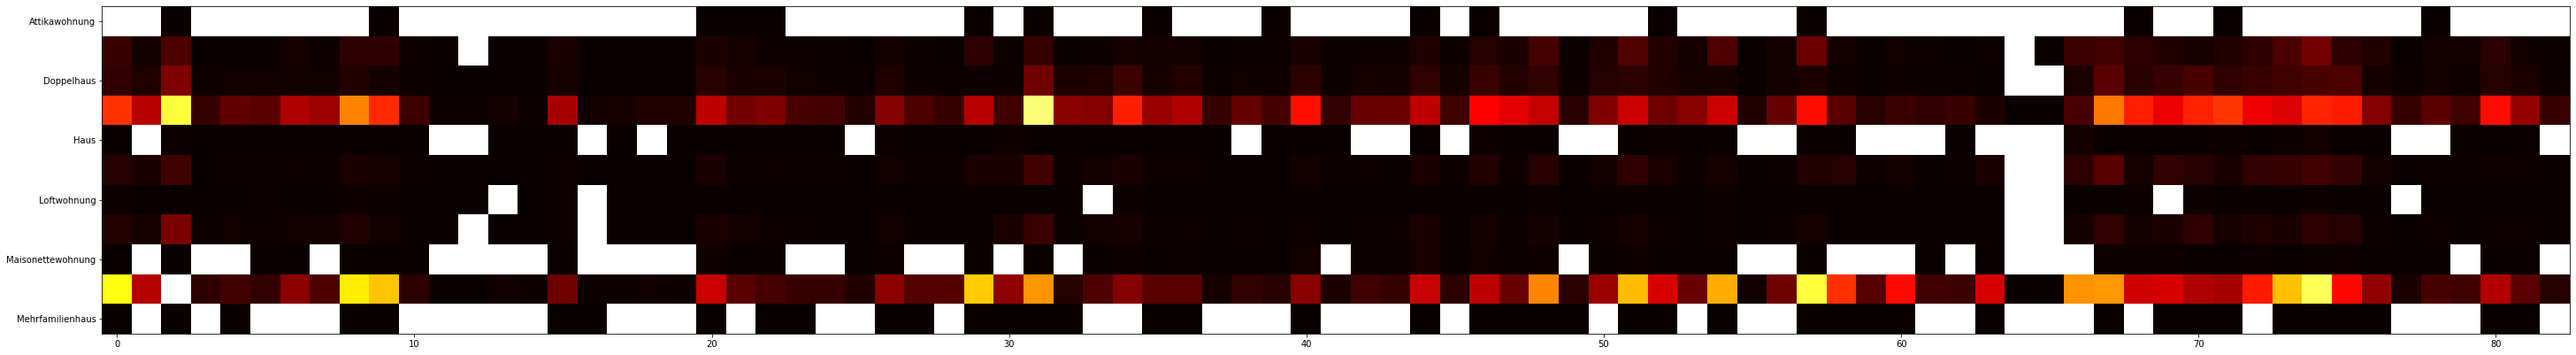

In [ ]:
fig, axs = plt.subplots(2, 2, figsize = (12, 8))
axs[0, 0].scatter(csv_data['Longitude'], csv_data['Latitude'], c = csv_data['Zip'], s = 5)
axs[0, 0].set_title('Original')
axs[0, 1].scatter(csv_data['Longitude'], csv_data['Latitude'], c = (csv_data['Zip'] / 100).astype('int64'), s = 5)
axs[0, 1].set_title('Zip = /100')
axs[1, 0].scatter(csv_data['Longitude'].round(decimals = 2), csv_data['Latitude'].round(decimals = 2), c = csv_data['Zip'], s = 0.1)
axs[1, 0].set_title('round = 2')
axs[1, 1].scatter(csv_data['Longitude'].round(decimals = 2), csv_data['Latitude'].round(decimals = 2), c = (csv_data['Zip'] / 100).astype('int64'), s = 0.1)
axs[1, 1].set_title('round = 2 and Zip /= 100')

for ax in axs.flat:
    ax.set(xlabel='Longitude', ylabel='Latitude')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()